In [99]:
import numpy as np
import pandas as pd
import rdkit.Chem as Chem
from matplotlib import pyplot as plt

In [119]:
def plot_num_atoms(path, name):
    smile_list = pd.read_csv(path,squeeze=True).astype(str).tolist()
    
    tot=0
    atom_num_dict = {}
    atom_num_list = []
    
    longest = 0 
    for smile in smile_list: 
        cnt = Chem.MolFromSmiles(smile).GetNumAtoms()
        atom_num_list.append(cnt)
        
        if cnt > longest:
            longest = cnt
        
        tot = tot + cnt
        
        if cnt in atom_num_dict.keys():
            atom_num_dict[cnt] = atom_num_dict[cnt]+1
        else:
            atom_num_dict[cnt] = 1    
    
    print("Total num : {}".format(len(atom_num_list)))
    print("Mean : {}".format(np.mean(atom_num_list)))
    print("Variance : {}".format(np.var(atom_num_list)))
    print("Longest : {}".format(longest))
    print("Shortest : {}".format(np.min(atom_num_list)))
    
    #fill the blank
    for l in range(longest+1):
        if l not in atom_num_dict.keys():
            atom_num_dict[l] = 0
    
    plt.plot(atom_num_dict.keys(), atom_num_dict.values())
    plt.xlabel("Atom's num")
    plt.ylabel("How many")
    plt.grid()
    plt.savefig('./data_distribution_result/{}.png'.format(name))
    plt.show()
    
    return atom_num_dict

In [121]:
def compare_mol_dist(dataA, dataB, nameA, nameB):
    plt.plot(dataA.keys(), dataA.values())
    plt.plot(dataB.keys(), dataB.values())
    plt.legend([nameA,nameB])
    plt.xlabel("Atom's num")
    plt.ylabel("How many")
    plt.grid()
    plt.savefig('./data_distribution_result/{}_{}.png'.format(nameA,nameB))
    plt.show()

Total num : 153398
Mean : 28.8904157812
Variance : 76.0919561486
Longest : 71
Shortest : 3


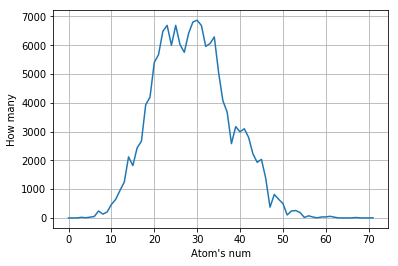

In [123]:
path = './data/121/train_121.txt'

train_121=plot_num_atoms(path, "l1000_train_121")


Total num : 220010
Mean : 23.1548065997
Variance : 20.3159240126
Longest : 38
Shortest : 6


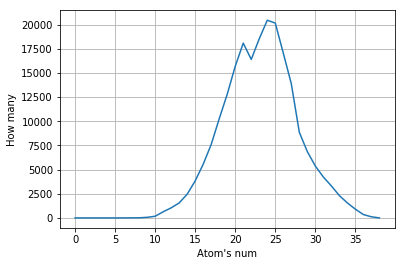

In [124]:
path = './data/zinc/train.txt'

zinc =plot_num_atoms(path, "zinc_train")


Total num : 176333
Mean : 29.8800621551
Variance : 113.745858316
Longest : 170
Shortest : 2


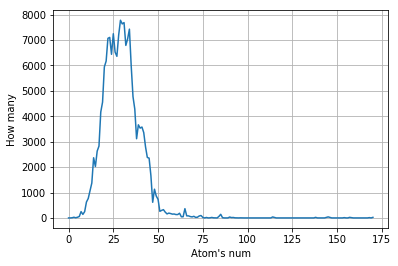

In [126]:
path = './data/121/all.txt'

l1000_all =plot_num_atoms(path, "l1000_all")


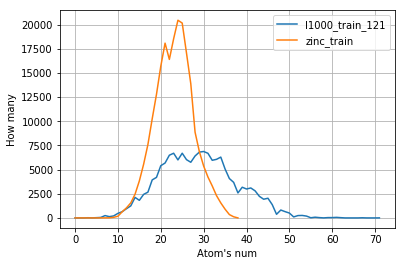

In [125]:
compare_mol_dist(train_121, zinc, "l1000_train_121", "zinc_train")

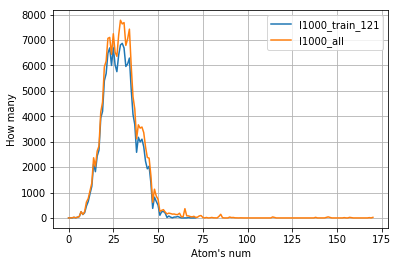

In [127]:
compare_mol_dist(train_121, l1000_all, "l1000_train_121", "l1000_all")